In [1]:
%load_ext autoreload
%autoreload 2

# Mix of tabular + image features

In [2]:
from cape_core.tensordata import *
from cape_core.models import *
from cape_core.utils import *
from cape_core.data import *
from cape_core.ranger import *
from fastai.callbacks import SaveModelCallback

In [3]:
PATH = Path.cwd()
PATH.ls()

[PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/feat_xr34_512_zoom20_256'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/zoom15'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_feature_sample-Copy1.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/labels_sample'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/feat_xr34_512_zoom15_256'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/train_classifier.py'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_sample_baseline.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_feature_sample.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/.ipynb_checkpoints'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/classifier_sample-refactor.ipynb'),
 PosixPath('/home/tc256

# Importing DataFrames

In [4]:
data = get_data(PATH); data.head()
# data = data[data.sgr_id>0]

,index,p_ab_rs_band,p_90_rs_band,dont_use_rs,p_ab_cs_band,p_90_cs_band,dont_use_cs,p_ab_3party_band,p_90_3party_band,dont_use_3party,...,cad_id,prop_id,asatdate,prop_titledeedtype,estate_id,sgr_id,suburb_id,trf_purchprice,prop_munvalinfl,train
23072,220570,8,10,0,4,7,0,0,0,1,...,6905651,11944540,2017-04-15,FH,0.0,0,9834.0,1550000.0,0.0,True
54670,190005,8,9,0,6,8,0,0,0,1,...,4669236,11360646,2017-09-11,FH,0.0,0,3496.0,900000.0,0.0,True
8194,193975,8,8,0,7,10,0,0,0,1,...,1057686,11435648,2017-02-08,FH,0.0,0,48.0,1995000.0,0.0,True
67378,446903,9,10,0,7,8,0,0,0,1,...,5487873,15736748,2017-11-07,FH,0.0,0,5545.0,900000.0,0.0,True
62748,48275,8,8,0,6,8,0,0,0,1,...,168364,9485339,2017-10-17,FH,0.0,0,4339.0,1230000.0,939320.0,True


In [5]:
# zooms = ['z15', 'z18', 'z20']
# zooms = ['zoom20_autoencoder', 'zoom18_autoencoder', 'zoom15_autoencoder']
# zooms = ['zoom18_256', 'zoom20_256']
zooms = ['512_zoom20_256','512_zoom18_256', '512_zoom15_256']

read all features DataFrames and put them on a list

In [6]:
df_list = [pd.read_pickle(f'feat_xr34_{zoom}').set_index('cad_id') for zoom in zooms]
feature_len = get_features_len(df_list[0].shape[1]); feature_len

512

In [7]:
df_list[0].head()

,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,img_feat_8,img_feat_9,...,img_feat_502,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511
cad_id,,,,,,,,,,,,,,,,,,,,,
6905651,0.001901,0.002313,0.001925,0.001879,0.002021,0.002060,0.001974,0.001899,0.001903,0.001962,...,0.001842,0.001861,0.001839,0.001835,0.001906,0.002033,0.002133,0.002022,0.001816,0.002023
4669236,0.001920,0.001929,0.001853,0.001910,0.001936,0.001910,0.001987,0.001880,0.001868,0.001955,...,0.002043,0.001905,0.001919,0.001877,0.002092,0.001969,0.001947,0.001923,0.001913,0.002003
1057686,0.001940,0.002048,0.001887,0.001839,0.001859,0.001857,0.001838,0.002063,0.002000,0.001744,...,0.001916,0.001992,0.001907,0.001758,0.001846,0.002151,0.001788,0.001822,0.001896,0.002234
5487873,0.001948,0.002045,0.001929,0.001868,0.001986,0.001939,0.001892,0.001911,0.001846,0.001861,...,0.001883,0.001946,0.001894,0.001859,0.001909,0.002114,0.001900,0.001947,0.001834,0.002085
168364,0.001907,0.002008,0.001840,0.001897,0.001934,0.001881,0.001999,0.001865,0.001902,0.001863,...,0.002018,0.001915,0.001865,0.001881,0.002025,0.001957,0.001981,0.001904,0.001881,0.001973


Concat the lists together

In [8]:
img_features = pd.concat([df.iloc[slice(None), -feature_len:] for df in df_list],
                         keys=zooms, 
                         axis=1)

In [9]:
img_features.head()

512_zoom20_256                                                         \
           img_feat_0 img_feat_1 img_feat_2 img_feat_3 img_feat_4 img_feat_5   
cad_id                                                                         
29           0.001827   0.002214   0.001785   0.002183   0.002092   0.002077   
76           0.001870   0.002051   0.001905   0.001857   0.001892   0.001953   
78           0.001865   0.002097   0.001812   0.001843   0.001964   0.001894   
148          0.001858   0.001989   0.001867   0.001873   0.001863   0.001851   
166          0.001953   0.002250   0.001842   0.001985   0.001998   0.001914   

                                                    ... 512_zoom15_256  \
       img_feat_6 img_feat_7 img_feat_8 img_feat_9  ...   img_feat_502   
cad_id                                              ...                  
29       0.002237   0.001785   0.002027   0.002194  ...       0.002362   
76       0.001856   0.001947   0.001832   0.001817  ...       0.001864   
78       0.002033   0.001875   0.001952   0.001829  ...       0.001877   
148      0.002022   0.001851   0.001953   0.001941  ...       0.002549   
166      0.002026   0.001863   0.002004   0.002048  ...       0.002320   

                                                                         \
       img_feat_503 img_feat_504 img_feat_505 img_feat_506 img_feat_507   
cad_id                                                                    
29         0.002024     0.001874     0.002249     0.002510     0.002125   
76         0.001713     0.001922     0.002060     0.001931     0.002088   
78         0.001688     0.001879     0.001952     0.001945     0.001842   
148        0.001746     0.002436     0.001830     0.002506     0.002253   
166        0.001757     0.001974     0.001867     0.002438     0.001869   

                                                            
       img_feat_508 img_feat_509 img_feat_510 img_feat_511  
cad_id                                                      
29         0.001666     0.001673     0.001576     0.001693  
76         0.001788     0.001919     0.001848     0.001667  
78         0.001742     0.002039     0.001757     0.001667  
148        0.001823     0.001699     0.001660     0.001682  
166        0.001831     0.001705     0.001614     0.001638  

[5 rows x 1536 columns]

In [10]:
img_features_flat = pd.DataFrame(data=img_features.values, index=img_features.index); img_features_flat.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
cad_id,,,,,,,,,,,,,,,,,,,,,
29,0.001827,0.002214,0.001785,0.002183,0.002092,0.002077,0.002237,0.001785,0.002027,0.002194,...,0.002362,0.002024,0.001874,0.002249,0.002510,0.002125,0.001666,0.001673,0.001576,0.001693
76,0.001870,0.002051,0.001905,0.001857,0.001892,0.001953,0.001856,0.001947,0.001832,0.001817,...,0.001864,0.001713,0.001922,0.002060,0.001931,0.002088,0.001788,0.001919,0.001848,0.001667
78,0.001865,0.002097,0.001812,0.001843,0.001964,0.001894,0.002033,0.001875,0.001952,0.001829,...,0.001877,0.001688,0.001879,0.001952,0.001945,0.001842,0.001742,0.002039,0.001757,0.001667
148,0.001858,0.001989,0.001867,0.001873,0.001863,0.001851,0.002022,0.001851,0.001953,0.001941,...,0.002549,0.001746,0.002436,0.001830,0.002506,0.002253,0.001823,0.001699,0.001660,0.001682
166,0.001953,0.002250,0.001842,0.001985,0.001998,0.001914,0.002026,0.001863,0.002004,0.002048,...,0.002320,0.001757,0.001974,0.001867,0.002438,0.001869,0.001831,0.001705,0.001614,0.001638


In [11]:
data = data.merge(img_features_flat.reset_index(), on='cad_id'); data.shape

(100000, 1599)

In [12]:
data.head()

,index,p_ab_rs_band,p_90_rs_band,dont_use_rs,p_ab_cs_band,p_90_cs_band,dont_use_cs,p_ab_3party_band,p_90_3party_band,dont_use_3party,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,220570,8,10,0,4,7,0,0,0,1,...,0.002073,0.001974,0.002046,0.002366,0.001954,0.002052,0.001795,0.001760,0.001700,0.001785
1,190005,8,9,0,6,8,0,0,0,1,...,0.001966,0.001830,0.002319,0.001771,0.001712,0.001653,0.001678,0.001750,0.001725,0.001920
2,193975,8,8,0,7,10,0,0,0,1,...,0.001653,0.001536,0.001841,0.001786,0.001586,0.002250,0.001682,0.001659,0.001533,0.001525
3,446903,9,10,0,7,8,0,0,0,1,...,0.001929,0.001757,0.001814,0.002303,0.001929,0.001682,0.002217,0.001913,0.001705,0.001717
4,48275,8,8,0,6,8,0,0,0,1,...,0.001989,0.001811,0.001948,0.002698,0.001904,0.001775,0.001711,0.002051,0.001712,0.001715


In [13]:
data.dropna(inplace=True)
data = data.reset_index(); data.shape

(98142, 1600)

In [14]:
val_idxs = data[~data['train']].index

In [15]:
cat_names = ['prop_aursrc','prop_modseg','asatMonth','prop_lastpurchMonth',
             'estate_id','prop_munvalYear','prop_lastpurchYear','dont_use_rs','asatElapsed','p_90_cs_band',
            'prop_bedrooms','date_3partyYear','asatYear','p_ab_final_3party_band','p_90_rs_band','p_90_3party_band',
             'p_ab_rs_band','date_rsYear','p_90_final_3party_band','dont_use_cs','prop_bathrooms','dont_use_3party',
            'p_ab_cs_band','p_ab_3party_band','munic_id','suburb_id']
cont_names = ['pct_offprops_cdn',
             'prop_munvalinfl',
             'prop_munval',
             'prop_lastpurchpriceinfl',
             'prop_firstlistingElapsedMonthsToDate',
             'prop_minlistingprice',
             'area_volotprecent',
             'distancemtoairportint',
             'predval_cs',
             'x',
             'predval_3party',
             'prop_recentotp',
             'estateschemedensity',
             'prop_aur',
             'area_maxlistingrecent',
             'cad_metersfromwater',
             'area_minlistingrecent',            
             'area_avglistingvaluerecent',
             'prop_age',
             'predval_final_3party',
             'distancemtolargeretailcentre',
             'area_avgotprecent',
             'y',        
             'predval_rs',
             'cad_metersfromcoast',
             'prop_recentotpElapsedMonthsToDate',
             'slope',   
             'cad_sqm',
             'distancemtomediumretailcentre']

In [16]:
data[cat_names].nunique()

prop_aursrc                 17
prop_modseg                 16
asatMonth                   12
prop_lastpurchMonth         12
estate_id                 4436
prop_munvalYear             13
prop_lastpurchYear          54
dont_use_rs                  2
asatElapsed                 30
p_90_cs_band                11
prop_bedrooms                6
date_3partyYear             49
asatYear                     3
p_ab_final_3party_band      11
p_90_rs_band                11
p_90_3party_band            11
p_ab_rs_band                11
date_rsYear                 41
p_90_final_3party_band      11
dont_use_cs                  2
prop_bathrooms              11
dont_use_3party              2
p_ab_cs_band                11
p_ab_3party_band            11
munic_id                   190
suburb_id                 5116
dtype: int64

In [17]:
dep_var='trf_purchprice'
procs = [FillMissing, Categorify, Normalize]
max_log_y = np.log(np.max(data[dep_var])*1.2)
y_range = torch.tensor([12, max_log_y], device=defaults.device); y_range

tensor([12.0000, 15.6073], device='cuda:0')

In [18]:
features = data.iloc[slice(None), -len(zooms)*feature_len:].values; features[0:3]

array([[0.001901, 0.002313, 0.001925, 0.001879, ..., 0.001795, 0.00176 , 0.0017  , 0.001785],
       [0.00192 , 0.001929, 0.001853, 0.00191 , ..., 0.001678, 0.00175 , 0.001725, 0.00192 ],
       [0.00194 , 0.002048, 0.001887, 0.001839, ..., 0.001682, 0.001659, 0.001533, 0.001525]], dtype=float32)

In [19]:
# cat_names = ['estate_id',
#              'suburb_id',
#              'prop_lastpurchYear']
# cont_names = ['prop_aur',
#              'prop_age',
#              'prop_munvalinfl',
#              'predval_cs']


features_il = TensorList.from_array(features)
tabular_il = TabularList.from_df(df=data[cat_names+cont_names+[dep_var]], 
                                 cat_names=cat_names, 
                                 cont_names=cont_names, 
                                 procs=procs)

In [20]:
db = (MixedItemList([tabular_il, features_il], path=PATH, inner_df=tabular_il.inner_df)
      .split_by_idx(val_idxs)
      .label_from_df(cols=dep_var, log=True)
      .databunch(no_check=True, bs=1024)
     )

# Train

In [21]:
learn = tabular_feature_learner(db, 
                                layers=[1000, 500],  
                                y_range=y_range, 
                                emb_drop=0.1,
                                loss_func=L1Flat(),
                                metrics=[exp_rmspe, exp_rmse, r2_score]).to_fp16(clip=1)

In [22]:
learn.model

TabularFeatureModel(
  (embeds): ModuleList(
    (0): Embedding(18, 8)
    (1): Embedding(17, 8)
    (2): Embedding(13, 7)
    (3): Embedding(13, 7)
    (4): Embedding(4085, 168)
    (5): Embedding(13, 7)
    (6): Embedding(53, 15)
    (7): Embedding(3, 3)
    (8): Embedding(21, 9)
    (9): Embedding(12, 6)
    (10): Embedding(7, 5)
    (11): Embedding(48, 14)
    (12): Embedding(3, 3)
    (13): Embedding(12, 6)
    (14): Embedding(12, 6)
    (15): Embedding(12, 6)
    (16): Embedding(12, 6)
    (17): Embedding(40, 13)
    (18): Embedding(12, 6)
    (19): Embedding(3, 3)
    (20): Embedding(12, 6)
    (21): Embedding(3, 3)
    (22): Embedding(12, 6)
    (23): Embedding(12, 6)
    (24): Embedding(188, 30)
    (25): Embedding(4939, 187)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(29, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=2109, out_features=1000, bias=True)
    (1): ReLU(inplace=True

In [23]:
learn.loss_func

FlattenedLoss of L1Loss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


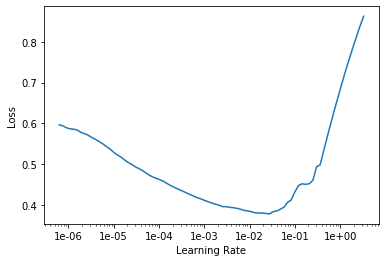

In [24]:
learn.lr_find(); learn.recorder.plot()

In [25]:
learn.fit_one_cycle(12, 
                    1e-3, 
                    callbacks=[SaveModelCallback(learn, monitor='exp_rmspe', mode='min', name='best_feature_tabular')])

epoch,train_loss,valid_loss,exp_rmspe,exp_rmse,r2_score,time
0,0.237972,0.219107,0.314299,475223.093750,0.753427,00:10
1,0.195926,0.189271,0.315619,396773.156250,0.801927,00:10
2,0.179648,0.198030,0.306252,454836.531250,0.793916,00:09
3,0.163238,0.173547,0.291729,357381.781250,0.824980,00:09
4,0.151815,0.194943,0.342169,379036.093750,0.795432,00:10
5,0.142484,0.166576,0.293549,354513.968750,0.834663,00:10
6,0.138706,0.175761,0.316124,356142.218750,0.821893,00:09
7,0.128441,0.153051,0.293961,335064.312500,0.851503,00:10
8,0.121577,0.171490,0.317877,345785.468750,0.825656,00:10
9,0.115042,0.162953,0.306719,344478.625000,0.838123,00:10


Better model found at epoch 0 with exp_rmspe value: 0.3142987787723541.
Better model found at epoch 2 with exp_rmspe value: 0.3062518835067749.
Better model found at epoch 3 with exp_rmspe value: 0.29172879457473755.
Better model found at epoch 10 with exp_rmspe value: 0.28855642676353455.
Better model found at epoch 11 with exp_rmspe value: 0.28058165311813354.


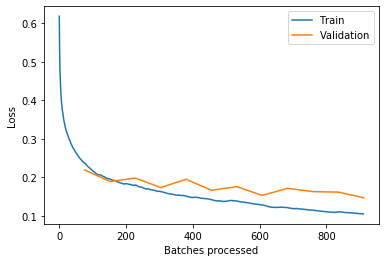

In [26]:
learn.recorder.plot_losses()

In [27]:
learn.load('best_feature_tabular');

In [28]:
p, t = learn.get_preds(DatasetType.Valid)

In [29]:
print_stats(p,t)


RMSE (log y): 0.22158142924308777
RMSE : 331676.625
RMSPE (log y): 0.016125217080116272
RMSPE: 0.2826422154903412

Data size : (19636,)
Performance Accuracy (A: Within 10%, B: Within 20%, etc)
A    0.520218
B    0.231870
C    0.112345
D    0.056936
E    0.078631
dtype: float64

Data Set size : (19636,)
Performance Accuracy
1: % Error < 20%    0.752088
2: % Error > 20%    0.247912
dtype: float64

Summary:
RMSE : 331676.625
RMSPE: 0.2826422154903412
%A: 0.5202179669993888
%AB: 0.7520880016296598
Proportion Under Valuations: 0.4365960480749643
